In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [113]:
#state,positive,negative,neutral,total_tweets
results={'Alabama':[48.93617021276596, 8.51063829787234, 42.5531914893617, 47],
'Alaska':[38.552540013917884, 16.075156576200417, 45.372303409881695, 1437],
'Arizona':[30.627306273062732, 14.391143911439114, 54.981549815498155, 271],
'Arkansas':[33.16195372750643, 20.95115681233933, 45.88688946015424, 778],
'California':[38.427947598253276, 21.397379912663755, 40.174672489082965, 229],
'Colorado':[39.75240715268226, 18.982118294360383, 41.26547455295736, 727],
'Connecticut':[37.41721854304636, 10.927152317880795, 51.65562913907284, 302],
'Delaware':[26.27450980392157, 10.84967320261438, 62.87581699346405, 765],
'Florida':[36.38814016172507, 15.902964959568733, 47.7088948787062, 371],
'Georgia':[21.723896285914506, 12.543798177995797, 65.7323055360897, 1427],
'Hawaii':[26.02131438721137, 13.0550621669627, 60.92362344582594, 1126],
'Idaho':[41.15942028985507, 20.579710144927535, 38.26086956521739, 345],
'Illinois':[26.89210950080515, 11.352657004830919, 61.75523349436393, 1242],
'Indiana':[19.74405850091408, 12.614259597806216, 67.64168190127971, 547],
'Iowa':[29.03225806451613, 14.746543778801843, 56.22119815668203, 434],
'Kansas':[21.024049650892167, 12.878200155159039, 66.0977501939488, 1289],
'Kentucky':[34.96503496503497, 24.895104895104893, 40.13986013986014, 715],
'Louisiana':[42.25941422594142, 16.736401673640167, 41.00418410041841, 239],
'Maine':[45.867768595041326, 18.87052341597796, 35.26170798898072, 726],
'Maryland':[41.24809741248097, 14.916286149162861, 43.83561643835616, 657],
'Massachusetts':[44.6875, 19.0625, 36.25, 320],
'Michigan':[37.38656987295826, 23.049001814882033, 39.56442831215971, 551],
'Minnesota':[25.43352601156069, 10.404624277456648, 64.16184971098265, 346],
'Mississippi':[42.3469387755102, 19.387755102040817, 38.265306122448976, 196],
'Missouri':[26.89295039164491, 13.838120104438643, 59.268929503916446, 383],
'Montana':[44.3609022556391, 14.285714285714285, 41.35338345864661, 266],
'Nebraska':[21.70731707317073, 14.146341463414632, 64.14634146341463, 410],
'Nevada':[20.965058236272878, 11.896838602329451, 67.13810316139767, 1202],
'New Hampshire':[33.33333333333333, 19.806763285024154, 46.85990338164252, 207],
'New Jersey':[37.423312883435585, 11.65644171779141, 50.920245398773, 163],
'New Mexico':[39.83739837398374, 14.227642276422763, 45.9349593495935, 246],
'New York':[33.98533007334964, 19.315403422982886, 46.69926650366748, 409],
'North Carolina':[39.30555555555556, 13.472222222222221, 47.22222222222222, 720],
'North Dakota':[21.458254627880617, 12.69361541367586, 65.84812995844352, 2647],
'Ohio':[38.31460674157303, 24.269662921348313, 37.41573033707865, 890],
'Oklahoma':[21.42126789366053, 12.678936605316974, 65.8997955010225, 1956],
'Oregon':[23.614274867122248, 14.123006833712983, 62.26271829916477, 1317],
'Pennsylvania':[33.33333333333333, 12.878787878787879, 53.78787878787878, 132],
'Rhode Island':[29.714285714285715, 18.285714285714285, 52.0, 350],
'South Carolina':[24.702380952380953, 15.327380952380953, 59.970238095238095, 672],
'South Dakota':[24.701195219123505, 17.928286852589643, 57.37051792828686, 251],
'Tennessee':[36.7816091954023, 13.136288998357964, 50.08210180623974, 1218],
'Texas':[22.031473533619454, 12.732474964234623, 65.23605150214593, 699],
'Utah':[35.294117647058826, 28.15126050420168, 36.554621848739494, 238],
'Vermont':[22.0, 14.727272727272728, 63.272727272727266, 550],
'Virginia':[39.23076923076923, 16.73076923076923, 44.03846153846154, 1040],
'Washington':[36.57142857142857, 22.285714285714285, 41.14285714285714, 175],
'West Virginia':[34.563520227111425, 21.00780695528744, 44.42867281760113, 1409],
'Wisconsin':[20.770519262981573, 13.400335008375208, 65.82914572864321, 597],
'Wyoming':[34.033149171270715, 21.215469613259668, 44.751381215469614, 905]}


In [114]:
real_results={'Alabama':[61, 37],
'Alaska':[53, 43],
'Arizona':[49,49],
'Arkansas':[62,35],
'California':[34,64],
'Colorado':[42,55],
'Connecticut':[39,59],
'Delaware':[40,59],
'Florida':[51.2,47.9],
'Georgia':[49.3,49.5],
'Hawaii':[34,64],
'Idaho':[64,33],
'Illinois':[41,57],
'Indiana':[57,41],
'Iowa':[53,45],
'Kansas':[56,41],
'Kentucky':[62,36],
'Louisiana':[58.46,39.85],
'Maine':[44,53],
'Maryland':[32.4,65.8],
'Massachusetts':[32,66],
'Michigan':[48,51],
'Minnesota':[45,52],
'Mississippi':[57,41],
'Missouri':[56.8,41.4],
'Montana':[57,40],
'Nebraska':[59,39],
'Nevada':[50.01,47.7],
'New Hampshire':[52.9,45.5],
'New Jersey':[41,57],
'New Mexico':[44,54],
'New York':[42,57],
'North Carolina':[50,49],
'North Dakota':[65,32],
'Ohio':[53,45],
'Oklahoma':[65,32],
'Oregon':[40,56],
'Pennsylvania':[48.8,50],
'Rhode Island':[39,59],
'South Carolina':[55,43],
'South Dakota':[62,36],
'Tennessee':[61,37],
'Texas':[52,47],
'Utah':[58,38],
'Vermont':[30.8,66.4],
'Virginia':[44.2,54.4],
'Washington':[39,58],
'West Virginia':[68.6,29.7],
'Wisconsin':[48.9,49.6],
'Wyoming':[70,27]}


In [115]:
len(results)

50

<BarContainer object of 1 artists>

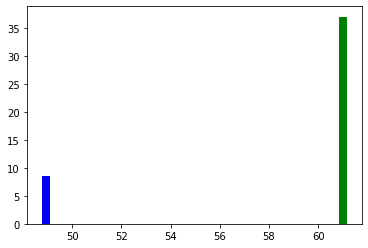

In [116]:
a=results['Alabama'][:2]
real_results['Alabama']
#plt.bar(a,height=10)
ax = plt.subplot(111)
w = 0.3
ax.bar(a[0], a[1], width=w, color='b', align='center')
ax.bar(real_results['Alabama'][0], real_results['Alabama'][1], width=w, color='g', align='center')

In [117]:
results['Alabama'][:2]

[48.93617021276596, 8.51063829787234]

In [118]:
real_results['Alabama']

[61, 37]

# we can calculate RMSE of the accuracies

In [119]:
predicted={}
for i in results:
  predicted[i]=results[i][:2]
predicted

{'Alabama': [48.93617021276596, 8.51063829787234],
 'Alaska': [38.552540013917884, 16.075156576200417],
 'Arizona': [30.627306273062732, 14.391143911439114],
 'Arkansas': [33.16195372750643, 20.95115681233933],
 'California': [38.427947598253276, 21.397379912663755],
 'Colorado': [39.75240715268226, 18.982118294360383],
 'Connecticut': [37.41721854304636, 10.927152317880795],
 'Delaware': [26.27450980392157, 10.84967320261438],
 'Florida': [36.38814016172507, 15.902964959568733],
 'Georgia': [21.723896285914506, 12.543798177995797],
 'Hawaii': [26.02131438721137, 13.0550621669627],
 'Idaho': [41.15942028985507, 20.579710144927535],
 'Illinois': [26.89210950080515, 11.352657004830919],
 'Indiana': [19.74405850091408, 12.614259597806216],
 'Iowa': [29.03225806451613, 14.746543778801843],
 'Kansas': [21.024049650892167, 12.878200155159039],
 'Kentucky': [34.96503496503497, 24.895104895104893],
 'Louisiana': [42.25941422594142, 16.736401673640167],
 'Maine': [45.867768595041326, 18.8705234

In [120]:
len(predicted)

50

In [121]:
val2=np.array(list(real_results.values()))

In [122]:
val1=np.array(list(predicted.values()))
val1

array([[48.93617021,  8.5106383 ],
       [38.55254001, 16.07515658],
       [30.62730627, 14.39114391],
       [33.16195373, 20.95115681],
       [38.4279476 , 21.39737991],
       [39.75240715, 18.98211829],
       [37.41721854, 10.92715232],
       [26.2745098 , 10.8496732 ],
       [36.38814016, 15.90296496],
       [21.72389629, 12.54379818],
       [26.02131439, 13.05506217],
       [41.15942029, 20.57971014],
       [26.8921095 , 11.352657  ],
       [19.7440585 , 12.6142596 ],
       [29.03225806, 14.74654378],
       [21.02404965, 12.87820016],
       [34.96503497, 24.8951049 ],
       [42.25941423, 16.73640167],
       [45.8677686 , 18.87052342],
       [41.24809741, 14.91628615],
       [44.6875    , 19.0625    ],
       [37.38656987, 23.04900181],
       [25.43352601, 10.40462428],
       [42.34693878, 19.3877551 ],
       [26.89295039, 13.8381201 ],
       [44.36090226, 14.28571429],
       [21.70731707, 14.14634146],
       [20.96505824, 11.8968386 ],
       [33.33333333,

In [123]:
# A Simple Confusion Matrix Implementation
def confusionmatrix(actual, predicted, normalize = False):
    """
    Generate a confusion matrix for multiple classification
    @params:
        actual      - a list of integers or strings for known classes
        predicted   - a list of integers or strings for predicted classes
        normalize   - optional boolean for matrix normalization
    @return:
        matrix      - a 2-dimensional list of pairwise counts
    """
    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    return matrix

In [124]:
val2-val1.sum()

array([[-2371.97557844, -2395.97557844],
       [-2379.97557844, -2389.97557844],
       [-2383.97557844, -2383.97557844],
       [-2370.97557844, -2397.97557844],
       [-2398.97557844, -2368.97557844],
       [-2390.97557844, -2377.97557844],
       [-2393.97557844, -2373.97557844],
       [-2392.97557844, -2373.97557844],
       [-2381.77557844, -2385.07557844],
       [-2383.67557844, -2383.47557844],
       [-2398.97557844, -2368.97557844],
       [-2368.97557844, -2399.97557844],
       [-2391.97557844, -2375.97557844],
       [-2375.97557844, -2391.97557844],
       [-2379.97557844, -2387.97557844],
       [-2376.97557844, -2391.97557844],
       [-2370.97557844, -2396.97557844],
       [-2374.51557844, -2393.12557844],
       [-2388.97557844, -2379.97557844],
       [-2400.57557844, -2367.17557844],
       [-2400.97557844, -2366.97557844],
       [-2384.97557844, -2381.97557844],
       [-2387.97557844, -2380.97557844],
       [-2375.97557844, -2391.97557844],
       [-2376.17

In [125]:
# labels 0 1
#        (T,B)  if T>B --0

In [126]:
list(real_results.values())

[[61, 37],
 [53, 43],
 [49, 49],
 [62, 35],
 [34, 64],
 [42, 55],
 [39, 59],
 [40, 59],
 [51.2, 47.9],
 [49.3, 49.5],
 [34, 64],
 [64, 33],
 [41, 57],
 [57, 41],
 [53, 45],
 [56, 41],
 [62, 36],
 [58.46, 39.85],
 [44, 53],
 [32.4, 65.8],
 [32, 66],
 [48, 51],
 [45, 52],
 [57, 41],
 [56.8, 41.4],
 [57, 40],
 [59, 39],
 [50.01, 47.7],
 [52.9, 45.5],
 [41, 57],
 [44, 54],
 [42, 57],
 [50, 49],
 [65, 32],
 [53, 45],
 [65, 32],
 [40, 56],
 [48.8, 50],
 [39, 59],
 [55, 43],
 [62, 36],
 [61, 37],
 [52, 47],
 [58, 38],
 [30.8, 66.4],
 [44.2, 54.4],
 [39, 58],
 [68.6, 29.7],
 [48.9, 49.6],
 [70, 27]]

In [127]:
labels=[]
for i in list(real_results.values()):
  if i[0]>i[1]: # trump wins
    labels.append(0)
  elif i[1]>=i[0]:
    labels.append(1)

In [128]:
np.array(labels)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0])

In [129]:
list(predicted.values())

[[48.93617021276596, 8.51063829787234],
 [38.552540013917884, 16.075156576200417],
 [30.627306273062732, 14.391143911439114],
 [33.16195372750643, 20.95115681233933],
 [38.427947598253276, 21.397379912663755],
 [39.75240715268226, 18.982118294360383],
 [37.41721854304636, 10.927152317880795],
 [26.27450980392157, 10.84967320261438],
 [36.38814016172507, 15.902964959568733],
 [21.723896285914506, 12.543798177995797],
 [26.02131438721137, 13.0550621669627],
 [41.15942028985507, 20.579710144927535],
 [26.89210950080515, 11.352657004830919],
 [19.74405850091408, 12.614259597806216],
 [29.03225806451613, 14.746543778801843],
 [21.024049650892167, 12.878200155159039],
 [34.96503496503497, 24.895104895104893],
 [42.25941422594142, 16.736401673640167],
 [45.867768595041326, 18.87052341597796],
 [41.24809741248097, 14.916286149162861],
 [44.6875, 19.0625],
 [37.38656987295826, 23.049001814882033],
 [25.43352601156069, 10.404624277456648],
 [42.3469387755102, 19.387755102040817],
 [26.8929503916

In [130]:
labels1=[]
for i in list(predicted.values()):
  if i[0]>i[1]: # trump wins
    labels1.append(0)
  elif i[1]>=i[0]:
    labels1.append(1)

In [131]:
len(labels)

50

In [132]:
np.array(labels1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [133]:
cm=confusion_matrix(labels,labels1)
cm

array([[27,  0],
       [23,  0]])

In [134]:
recall_score(labels,labels1)

0.0

In [135]:
cr=classification_report(labels,labels1,labels=[0,1])
print("Classification report\n",cr)

Classification report
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        27
           1       0.00      0.00      0.00        23

    accuracy                           0.54        50
   macro avg       0.27      0.50      0.35        50
weighted avg       0.29      0.54      0.38        50



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


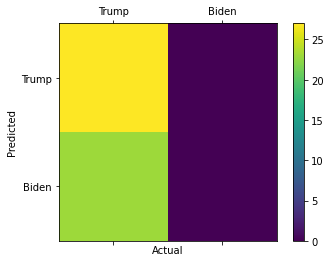

In [136]:
label = [0,1]
cm = confusion_matrix(labels, labels1, labels=label)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

fig.colorbar(cax)
names=['Trump','Biden']
ax.set_xticklabels([''] + names)
ax.set_yticklabels([''] + names)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [137]:
import sklearn
print(sklearn.metrics.roc_auc_score(labels, labels1))

0.5


Text(0, 0.5, 'Frequency')

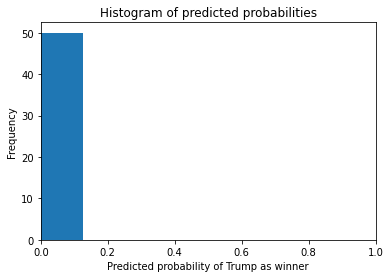

In [138]:
plt.hist(labels1, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Trump as winner')
plt.ylabel('Frequency')